In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random
from datetime import datetime, timedelta


In [4]:
# base de datos de ventas- supermercado
data = pd.read_csv('/content/drive/MyDrive/IN1002B_204/supermarket_sales - Sheet1.csv')

In [5]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Generar fechas aleatorias

In [6]:
def generar_fechas_aleatorias(inicio, fin, n, semilla):
    """
    Genera una lista de fechas aleatorias entre dos fechas.

    inicio: Fecha inicial en formato 'YYYY-MM-DD'
    fin: Fecha final en formato 'YYYY-MM-DD'
    n: Número de fechas aleatorias a generar
    return: Lista de fechas aleatorias
    """
    if semilla is not None:
        random.seed(semilla)

    # Convertir las fechas de strings a objetos datetime
    fecha_inicio = datetime.strptime(inicio, '%Y-%m-%d')
    fecha_fin = datetime.strptime(fin, '%Y-%m-%d')

    # Calcular la diferencia de días entre las fechas
    delta_dias = (fecha_fin - fecha_inicio).days

    # Generar fechas aleatorias
    fechas_aleatorias = []
    for _ in range(n):
        dias_aleatorios = random.randint(0, delta_dias)
        fecha_random = fecha_inicio + timedelta(days=dias_aleatorios)
        fechas_aleatorias.append(fecha_random.strftime('%Y-%m-%d'))

    return fechas_aleatorias

inicio = '2020-01-01'
fin = '2023-12-31'
n = len(data.Branch) # largo de una columna del dataframe

data['Date'] = generar_fechas_aleatorias(inicio, fin, n, 42)

In [7]:
data['Date']  = pd.to_datetime(data['Date'])

In [8]:
# Año

data['Year'] = data.Date.dt.year

# Mes
data['Month'] = data.Date.dt.month

<ipython-input-9-5edfdd880a3b>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, y="Total", x="Month", hue = 'Gender', ci = None)


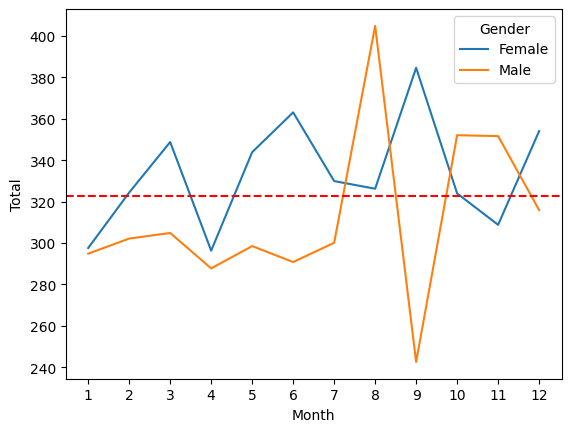

In [9]:
sns.lineplot(data=data, y="Total", x="Month", hue = 'Gender', ci = None)
plt.xticks(ticks=data['Month'].unique())

# Agregamos una línea de guía, mostraremos el promedio de ventas en todos los periodos
plt.axhline(y=data.Total.mean(), color='red', linestyle='--', label='Línea Punteada')

# Mostrar el gráfico
plt.show()

# **Repaso y Diseño de gráficos**

En esta sección, realizaremos un repaso de las primeras dos funciones vistas en la sesi+on anterior: ```sns.histplot()``` y ```sns.boxplot()```

Para ello, trabajaremos con la base de datos *Impact_of_Remote_Work_on_Mental_Health.csv*


In [10]:
df = pd.read_csv('/content/drive/MyDrive/IN1002B_204/Impact_of_Remote_Work_on_Mental_Health.csv')

In [11]:
#df.shape
df.shape

(5000, 20)

In [12]:
# head()
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [13]:
# isnull().sum()
df.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


En esta sesión haremos un repaso de algunas de las funciones vistas en la clase anterior, pero ahora trabajaremos tambien en aspectos de diseño.

## **Histogramas**

Para este ejemplo, coloquen la variable de horas trabajadas por semana en ```x = ```

<Axes: xlabel='Hours_Worked_Per_Week', ylabel='Count'>

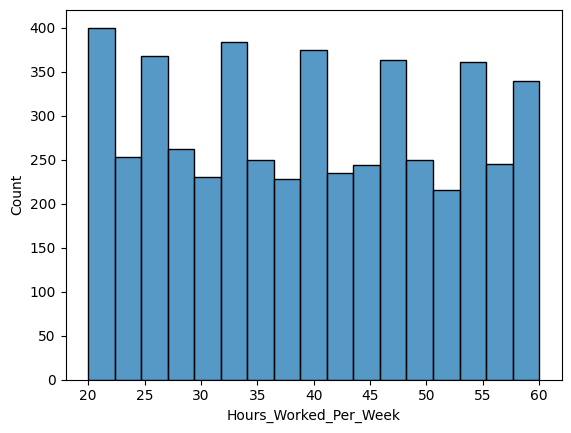

In [14]:
sns.histplot(data = df, x = 'Hours_Worked_Per_Week')

Para saber cúal es el número indicado de bins (barras), una forma es con la regla de Sturges que nos indica:

$bin = 1 + \log_2(n)$

Donde *n* representa el número de datos:

Referencia: https://www.lifeder.com/regla-sturges/


In [15]:
# Aplicando la regla de Sturges

bins= int(1 + np.log2(len(df.Hours_Worked_Per_Week)))
bins

13

Debido a que la ecuación nos da como resultado 13 bines, vamos a aplicarlo en el código del histograma:

<Axes: xlabel='Hours_Worked_Per_Week', ylabel='Count'>

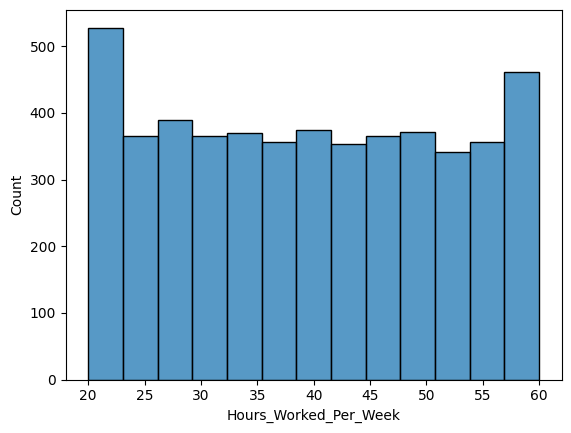

In [16]:
# agregar: bins = bins
sns.histplot(data = df, x = 'Hours_Worked_Per_Week', bins = bins)

Nuestra distribución ahora parece más un estilo uniforme.


<Axes: xlabel='Hours_Worked_Per_Week', ylabel='Count'>

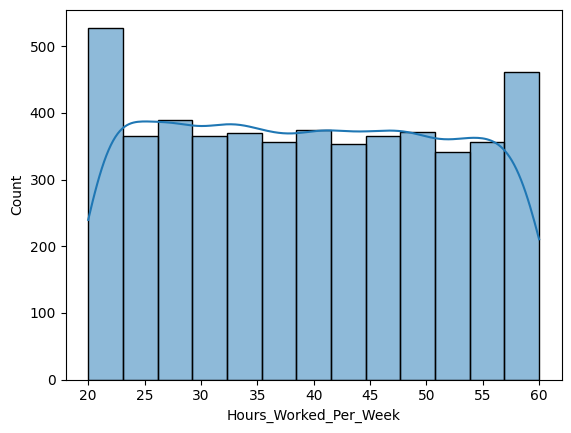

In [17]:
# Agregar kde = True
sns.histplot(data = df, x = 'Hours_Worked_Per_Week', bins = bins, kde = True)

**kde =** Función de densidad de probabilidad

La función de densidad de probabilidad ayuda a identificar regiones de mayores y menores probabilidades para valores de una variable aleatoria.

En este gráfico, la KDE comienza alta alrededor de las 20 horas trabajadas por semana, baja gradualmente hacia la parte media (alrededor de las 40 horas), y vuelve a subir cerca de las 60 horas. Esto indica que hay una mayor probabilidad de encontrar personas trabajando en esos extremos (20 y 60 horas), mientras que entre 30 y 55 horas hay menos variabilidad en el número de personas.


Por último, definamos el estilo y color del gráfico:

<Axes: xlabel='Hours_Worked_Per_Week', ylabel='Count'>

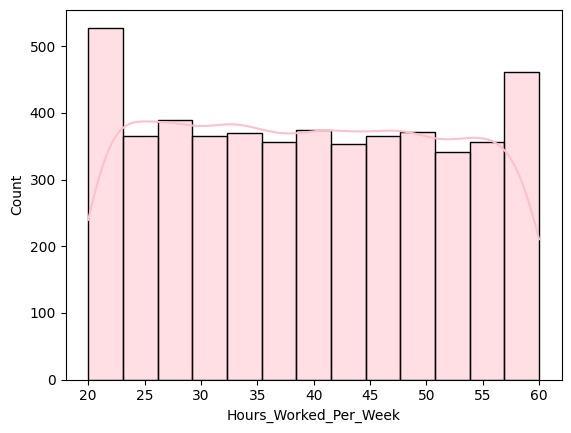

In [18]:
# color = ' '
sns.histplot(data = df, x = 'Hours_Worked_Per_Week', bins = bins, kde = True, color = 'pink')

Por último trabajaremos en las leyendas de eje, para eso llamaremos a ```matplot```.

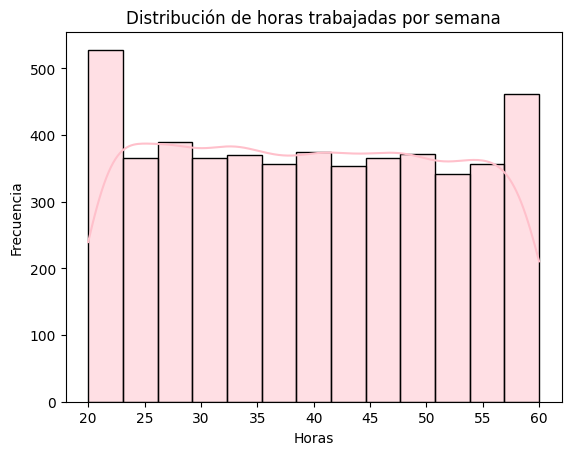

In [21]:
sns.histplot(data = df, x = 'Hours_Worked_Per_Week', bins = bins, kde = True, color = 'pink')
plt.title('Distribución de horas trabajadas por semana') # Título del gráfico
plt.xlabel('Horas') # Leyenda del eje x
plt.ylabel('Frecuencia') # Leyenda del eje y
plt.show() # Mostrar el gráfico

## **Diagrama de caja y bigote**

Ahora retomemos el segundo gráfico. En esta ocasión, vamos a hacer el diagrama de caja con la misma variable, pero agregando una segunda para ver información mas detallada.


<Axes: xlabel='Hours_Worked_Per_Week'>

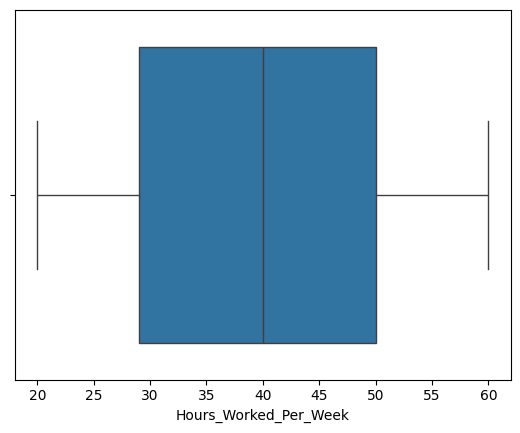

In [22]:
sns.boxplot(data = df, x = 'Hours_Worked_Per_Week')

In [23]:
# Cuartil 1
df.Hours_Worked_Per_Week.quantile(0.25)

29.0

El gráfico anterior nos indica que el 25% de los encuestados trabajan trabajan hasta 29 horas a la semana.



In [24]:
df.Hours_Worked_Per_Week.quantile(0.75)

50.0

Y un 75% hasta 50 horas semanales 😞

Sigamos trabajando con este mismo código. Ahora agreguen el parámetro ```y = 'Gender```

<Axes: xlabel='Hours_Worked_Per_Week', ylabel='Gender'>

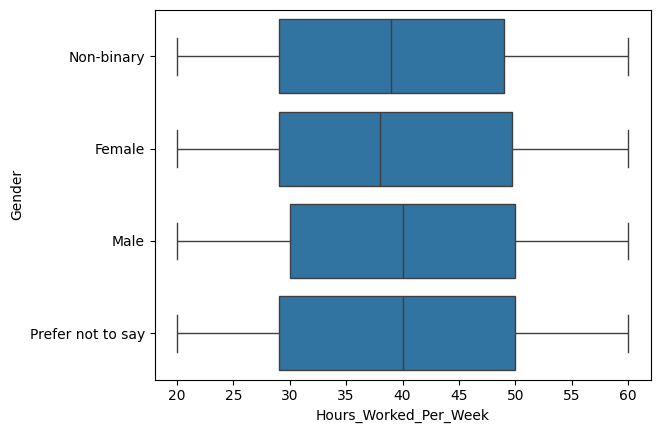

In [27]:
sns.boxplot(data = df, x = 'Hours_Worked_Per_Week', y = 'Gender')

Si comparamos el Q2 (mediana), vemos una gran diferencia.
En el caso de las mujeres, un 50% de ellas trabajan hasya 37 horas (aproximadamente), mientras que en el caso de los hombres es hasta 40 horas.



Para casi finalizar el gráfico, revisen cuantas categorías tiene la columna ```Work_Location```:

In [26]:
# nunique()
df.Work_Location.nunique()

3

Ahora agreguen el parametro ```hue = 'Work_Location'``` dentro del código anterior:

<Axes: xlabel='Hours_Worked_Per_Week', ylabel='Gender'>

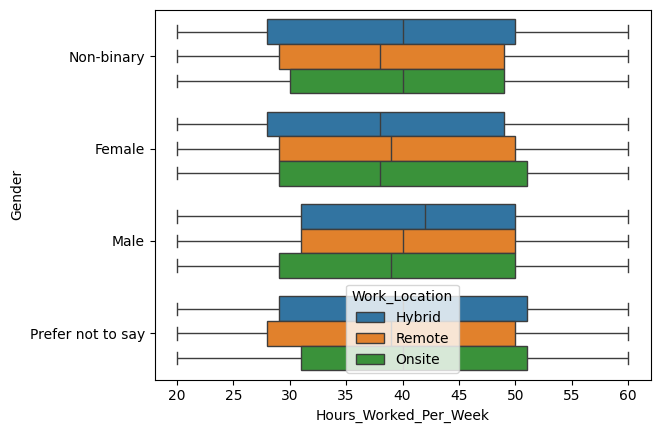

In [28]:
# hue
sns.boxplot(data = df, x = 'Hours_Worked_Per_Week', y = 'Gender', hue = 'Work_Location')

Si solo analizamos a las mujeres, podemos ver que la mediana cambia si el ttrabajo es remoto. Lo que quiere decir que tienden a trabajar más horas en esa modalidad.

Finalmente, coloquemos detalles finales en el gráfico.

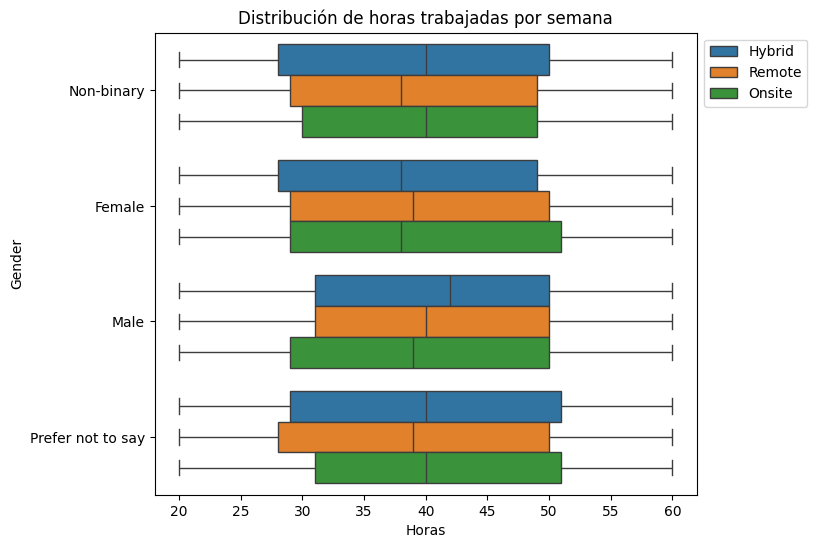

In [30]:
plt.figure(figsize=(7, 6)) # tamaño de la figura
sns.boxplot(data = df, x = 'Hours_Worked_Per_Week', y = 'Gender', hue = 'Work_Location')
plt.title('Distribución de horas trabajadas por semana') # Título del gráfico
plt.xlabel('Horas') # Leyenda del eje x
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show() # Mostrar el gráfico

```sns.boxplot()``` acepta paleta de colores.

Revisen este link: y elijan la de su referencia:
https://seaborn.pydata.org/tutorial/color_palettes.html

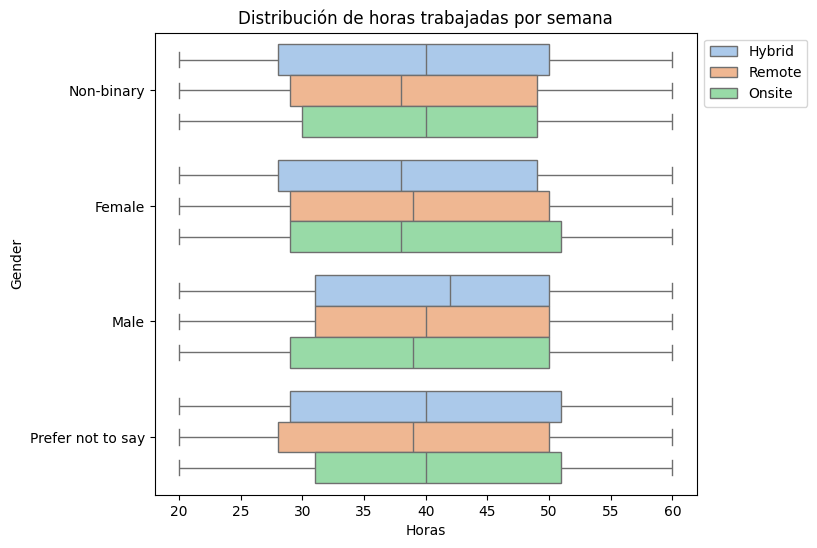

In [31]:
plt.figure(figsize=(7, 6))
sns.boxplot (data = df, x = 'Hours_Worked_Per_Week', y = 'Gender', hue = 'Work_Location', palette = 'pastel')
plt.title('Distribución de horas trabajadas por semana') # Título del gráfico
plt.xlabel('Horas') # Leyenda del eje x
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show() # Mostrar el gráfico

La misma idea se repite en funciones como ```sns.countplot()``` y ```sns.catplot()```. Solo se trata de elegir cuidadosamente sus variables y jugar con los diseños 😀

## Gráficos de dispersión

Un gráfico de dispersión muestra la relación entre dos variables continuas.

Por dicha razón, vamos a cambiar de base de datos a **Iris**.

El dataset Iris es un conjunto de datos de clasificación multiclase clásico y muy sencillo. Introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 "The use of multiple measurements in taxonomic problems". El conjunto de datos de Iris contiene cuatro características (longitud y anchura de sépalos y pétalos) de 50 muestras de tres especies de flores Iris (Iris setosa, Iris virginica e Iris versicolor)

https://www.kaggle.com/code/joeportilla/analisis-exploratorio-de-datos-dataset-iris


In [32]:
# cargar base de datos
iris = pd.read_csv('/content/drive/MyDrive/IN1002B_204/Iris.csv')

In [33]:
# head()
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Vamos a trabajar con la función ```sns.sctaterplot()``` con las columnas ```'SepalLengthCm'``` y ```'SepalWidthCm'``` en los parámetros **x** y **y** respectivamente.

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

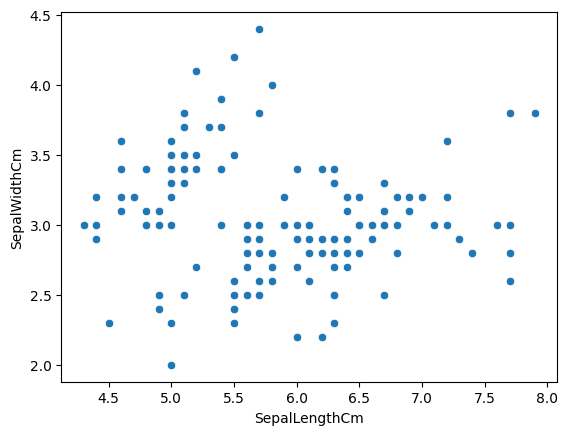

In [35]:
sns.scatterplot(data = iris, x = 'SepalLengthCm', y = 'SepalWidthCm')

Agreguemos ```hue = ''``` con la única vriable cuantitativa en el dataset.

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

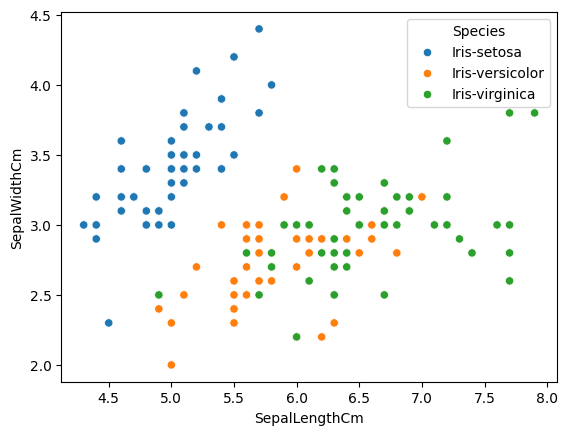

In [36]:
# hue = ' '
sns.scatterplot(data = iris, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species')

Ahora lo trtabajaremos con la técnica de "**burbuja**".

Esta consiste en que el tamaño de la burbuja dependerá del valor de esa variable en el dataset.

Por ejemplo:
- si X es 10 y Y es 12, Y será ligeramente más grande que X en el scatter plot.  

Agreguen el parámetro ```size = 'PetalLengthCm'``` en el código anterior.



<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

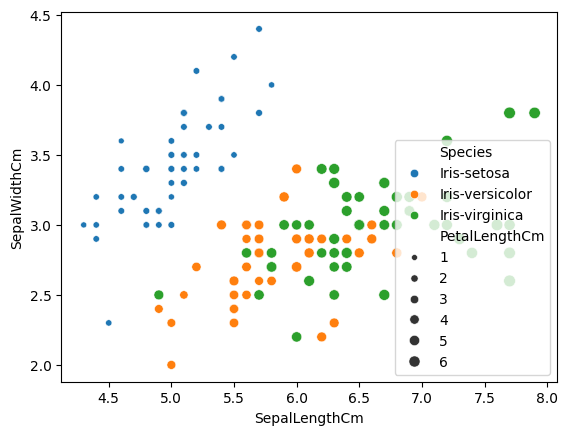

In [37]:
# size = ' '
sns.scatterplot(data = iris, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', size = 'PetalLengthCm')

Finalmente coloquemos el parámetro ```sizes = (10,100)```.
Estos valores no son fijos y los podemos adecuar a nuestras necesidades.

Lo que indican es el rango de tamaño que tendran las burbujas en el gráfico.

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

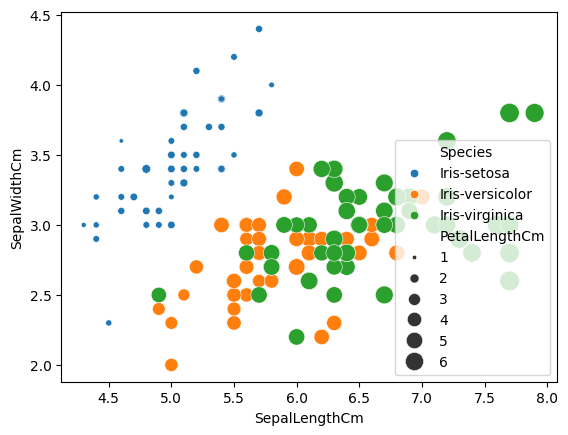

In [38]:
# sizes = (10,100)
sns.scatterplot(data = iris, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', size = 'PetalLengthCm', sizes = (10,200))

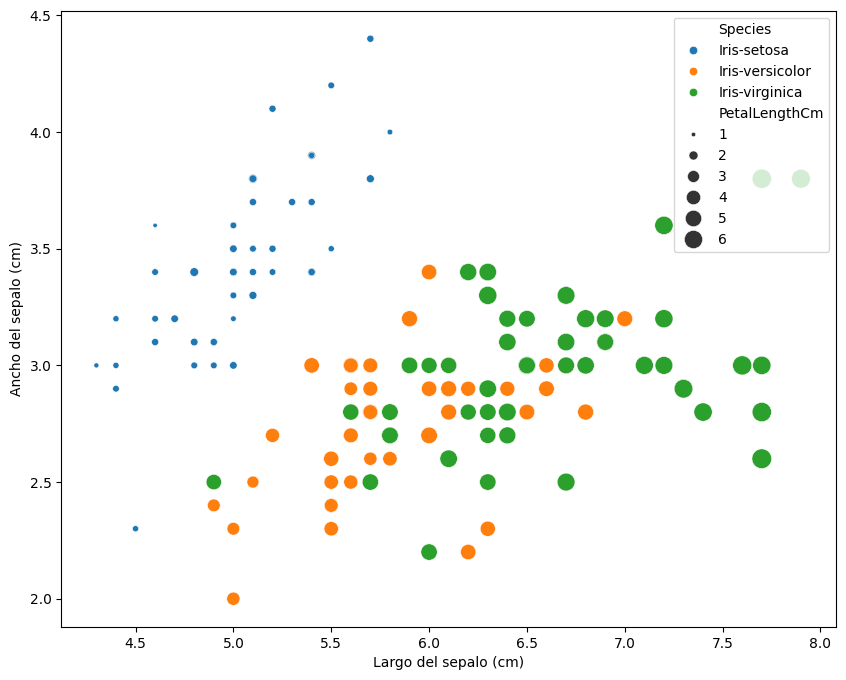

In [40]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = iris, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', size = 'PetalLengthCm', sizes = (10,200))
#plt.title('SepalLengthCm & SepalWidthCm') # Título del gráfico
plt.xlabel('Largo del sepalo (cm)') # Leyenda del eje x
plt.ylabel('Ancho del sepalo (cm)') # Leyenda del eje y
plt.legend(loc='upper right', bbox_to_anchor=(1, 1) )
plt.show() # Mostrar el gráfico

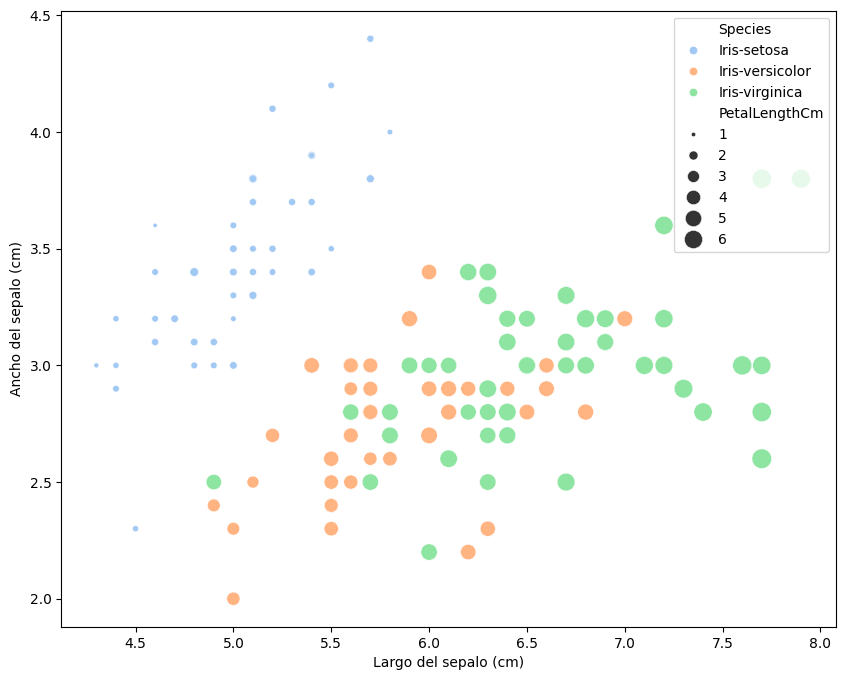

In [41]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = iris, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', size = 'PetalLengthCm', sizes = (10,200), palette = 'pastel')
#plt.title('SepalLengthCm & SepalWidthCm') # Título del gráfico
plt.xlabel('Largo del sepalo (cm)') # Leyenda del eje x
plt.ylabel('Ancho del sepalo (cm)') # Leyenda del eje y
plt.legend(loc='upper right', bbox_to_anchor=(1, 1) )
plt.show() # Mostrar el gráfico

## **Estilos y contextos**

En lugar de definir un color por gráfico, ```seaborn``` les permite elegir estilos y contextos.

El estilo ya contiene un tipo de letra y fondo. Ustedes pueden por función definir su paleta de colores.

Es muy recomendable para la realización de reportes o proyectos.

https://python-charts.com/seaborn/themes/

https://www.codecademy.com/article/seaborn-design-i


In [42]:
# Definimos el tema

sns.set_style("dark") # darkgrid, whitegrid, dark, white, ticks
sns.set_context("paper")

<Axes: xlabel='Hours_Worked_Per_Week', ylabel='Count'>

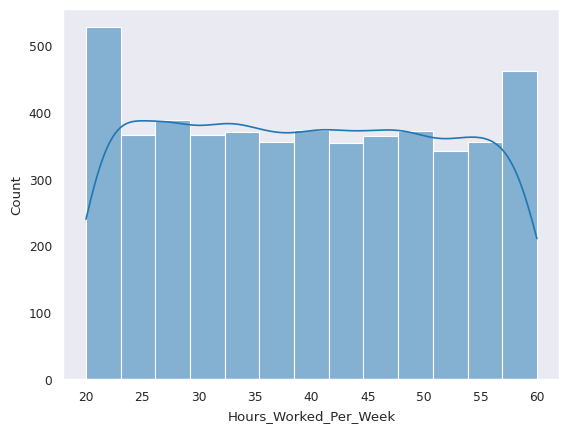

In [43]:
# Histograma

sns.histplot(data = df, x = 'Hours_Worked_Per_Week', bins = bins, kde = True)


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

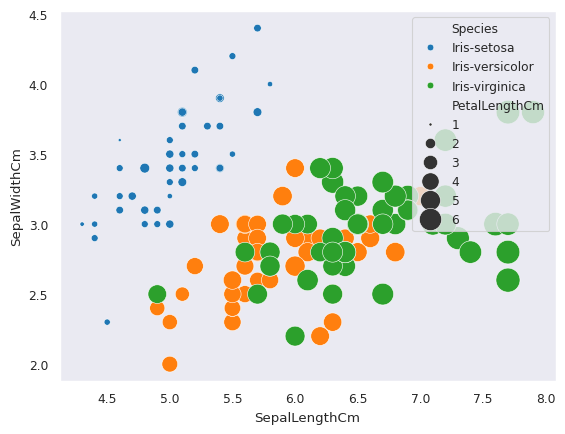

In [44]:
# Scatter
sns.scatterplot(data = iris, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', size = 'PetalLengthCm',
                sizes= (5,300))